# YOLO v5 pour la détéction des portes

### Installation de Pytorch

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Il faut se rendre au site officiel de Pytorch pour sélectionner la version et la configuration de Pytorch qui convient votre outil informatique.  

![image.png]('image.png')

In [2]:
!pip3 install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
!pip install opencv-python

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |████████████████████████████████| 169.1 MB 63 kB/s 
     |████████████████████████████████| 13.3 MB 30.3 MB/s 
     |████████████████████████████████| 1.9 MB 43.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.11.0+cu113
    Uninstalling torchaudio-0.11.0+cu113:
      Successfully uninstalled torchaudio-0.11.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires

In [1]:
# Installation de PyTesseract dans Colab
!pip install pytesseract

## Importation des bibliothèques

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
# Importation des bibliothèques pour traiter les images 
import pytesseract
import os
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
# Patch pour utiliser CV2 dans Colab
from google.colab.patches import cv2_imshow

In [4]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'custom', 
                            path='/content/drive/MyDrive/Colab Notebooks/00.Cas_pratique_ia/Models/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-16 Python-3.7.13 torch-1.8.2+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


## Détéction de porte à partir d'une WebCam

In [6]:
Label = [' Porte ']
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(2, 3))
classid = 0

CONFIDENCE_THRESHOLD = 0.7

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
       
    boxes = []
    class_ids = []
    
    results = model_yolo(frame)
    for i in range(0,len(results.pred[0])) :
        if results.pred[0][i,4] > CONFIDENCE_THRESHOLD :
            
            x = int(results.pred[0][i,0])
            y = int(results.pred[0][i,1])
            w = int(results.pred[0][i,2])
            h = int(results.pred[0][i,3])
            box = np.array([x, y, w, h])
            boxes.append(box)
    
    
    for box in boxes:
        color = colors[int(classid) % len(colors)]
        cv2.rectangle(frame, box, color, 2)
        cv2.rectangle(frame, (box[0], box[1] - 20), (box[0] + box[2], box[1]), color, -1)
        cv2.putText(frame, Label[classid], (box[0], box[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
    # Affichage en utilisnt l patch CV2 dans colab (cv2_ au lieu de CV2.)
    cv2_imshow('Output', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Détéction de porte à partir d'une vidéo

In [7]:
lsLabel = [' Porte ']
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(2, 3))
classid = 0

CONFIDENCE_THRESHOLD = 0.7

cap = cv2.VideoCapture('Exemple/Vidéo_Porte.MOV')
while cap.isOpened():
    ret, frame = cap.read()
       
    boxes = []
    class_ids = []
    
    results = model_yolo(frame)
    for i in range(0,len(results.pred[0])) :
        if results.pred[0][i,4] > CONFIDENCE_THRESHOLD :
            
            x = int(results.pred[0][i,0])
            y = int(results.pred[0][i,1])
            w = int(results.pred[0][i,2])
            h = int(results.pred[0][i,3])
            box = np.array([x, y, w, h])
            boxes.append(box)
    
    
    for box in boxes:
        color = colors[int(classid) % len(colors)]
        cv2.rectangle(frame, (box[0],box[1]), (box[1]+box[2],box[1]+box[3]), color, 2)
        cv2.rectangle(frame, (box[0], box[1]), (box[1] + box[2], box[1]+20), color, -1)
        cv2.putText(frame, Label[classid], (box[0], box[1] + 15), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
    
    cv2.imshow('Output', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## Détéction de porte à partir d'une image 

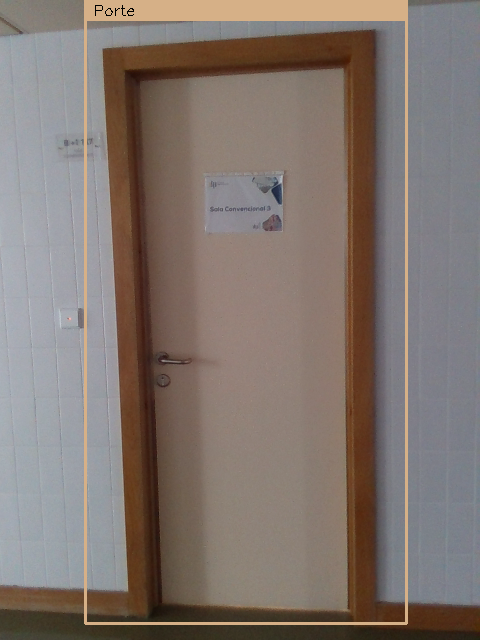

In [16]:
Label = [' Porte ']
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(2, 3))
boxes = []
classid = 0

CONFIDENCE_THRESHOLD = 0.6

Img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/00.Cas_pratique_ia/Exemple/Img_Porte.png')
#Img = cv2.resize(Img, (640,640), interpolation = cv2.INTER_AREA)

results = model_yolo(Img)

for i in range(0,len(results.pred[0])) :
    if results.pred[0][i,4] > CONFIDENCE_THRESHOLD :
        
        x = int(results.pred[0][i,0])
        y = int(results.pred[0][i,1])
        w = int(results.pred[0][i,2])
        h = int(results.pred[0][i,3])
        box = np.array([x, y, w, h])
        boxes.append(box)
    
for box in boxes:
    color = colors[int(classid) % len(colors)]
    
    cv2.rectangle(Img, (box[0],box[1]), (box[1]+box[2],box[1]+box[3]), color, 2)
    
    cv2.rectangle(Img, (box[0], box[1]), (box[1] + box[2], box[1]+20), color, -1)
    cv2.putText(Img, Label[classid], (box[0], box[1] + 15), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
# Affihage avec le patch CV2 dans colab
cv2_imshow(Img)


cv2.waitKey(0)
cv2.destroyAllWindows()

## Detection de porte + Crop

In [31]:
 !pip install pytesseract

In [40]:
# pytesseract.pytesseract.tesseract_cmd = r'C:\Tesseract-OCR\tesseract.exe'
# Patch pour utiliser CV2 dans Colab
from google.colab.patches import cv2_imshow
import pytesseract

Label = [' Porte ']
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(2, 3))
boxes = []
classid = 0

CONFIDENCE_THRESHOLD = 0.6

Img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/00.Cas_pratique_ia/Exemple/Img_Porte.png')
#Img = cv2.resize(Img, (640,640), interpolation = cv2.INTER_AREA)

# Convert it to the gray-scale
gry = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# OCR detection
d = pytesseract.image_to_data(gry, config="--psm 6", output_type=pytesseract.Output.DICT)





results = model_yolo(Img)

for i in range(0,len(results.pred[0])) :
    if results.pred[0][i,4] > CONFIDENCE_THRESHOLD :
        
        x = int(results.pred[0][i,0])
        y = int(results.pred[0][i,1])
        w = int(results.pred[0][i,2])
        h = int(results.pred[0][i,3])
        box = np.array([x, y, w, h])
        boxes.append(box)
    
for box in boxes:
    color = colors[int(classid) % len(colors)]
    
    cv2.rectangle(Img, (box[0],box[1]), (box[1]+box[2],box[1]+box[3]), color, 2)
    
    cv2.rectangle(Img, (box[0], box[1]), (box[1] + box[2], box[1]+20), color, -1)
    cv2.putText(Img, Label[classid], (box[0], box[1] + 15), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
    
    
    # Crop the image
    crp = gry[y:y + h, x:x + w]

    # OCR
    txt = pytesseract.image_to_string(crp, config="--psm 6")
    print(txt)

# Display the cropped image
cv2_imshow(crp)
cv2_imshow(Img)


cv2.waitKey(0)
cv2.destroyAllWindows()

TesseractNotFoundError: ignored

## Matrice de confusion